In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [3]:
# Define the cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    J = -(1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    grad = (1/m) * (X.T @ (h - y))
    return J, grad



In [4]:
# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        J_history[i], grad = cost_function(theta, X, y)
        theta -= alpha * grad
    return theta, J_history


In [5]:
# Generate a random binary classification dataset
np.random.seed(42)
X = np.random.randn(1000, 4)
y = np.random.randint(0, 2, size=1000)

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the dataset into training and testing sets
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

Accuracy: 0.4995777777777778


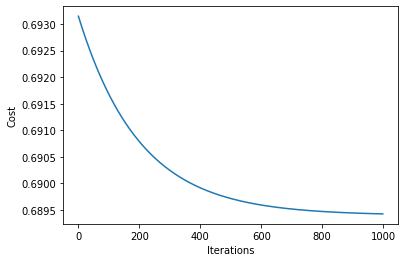

In [6]:
# Initialize theta and set hyperparameters
theta = np.zeros((X.shape[1], 1))
alpha = 0.01
num_iters = 1000

# Perform gradient descent to find optimal theta
theta, J_history = gradient_descent(X_train, y_train.reshape(-1, 1), theta, alpha, num_iters)

# Evaluate the model on the testing data
h = sigmoid(X_test @ theta)
y_pred = (h >= 0.5).astype(int)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plot the cost function over time
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()